In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, accuracy_score, precision_score, recall_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*70)
print("CREDIT CARD FRAUD DETECTION - ML PIPELINE")
print("="*70)

CREDIT CARD FRAUD DETECTION - ML PIPELINE


In [2]:
# DATA LOADING AND EXPLORATION
# ============================================================================
print("\n[STEP 1] Loading Dataset...")

# Download dataset from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud
# For this example, we'll simulate the data structure
# REPLACE THIS WITH: df = pd.read_csv('creditcard.csv')

# Simulating dataset structure (REPLACE WITH ACTUAL DATA)
np.random.seed(42)
n_samples = 10000
df = pd.DataFrame({
    'Time': np.random.randint(0, 172800, n_samples),
    **{f'V{i}': np.random.randn(n_samples) for i in range(1, 29)},
    'Amount': np.random.exponential(scale=50, size=n_samples),
    'Class': np.random.choice([0, 1], n_samples, p=[0.998, 0.002])
})

print(f"Dataset loaded: {df.shape[0]} transactions, {df.shape[1]} features")
print(f"\nClass Distribution:")
print(df['Class'].value_counts())
print(f"Fraud Percentage: {(df['Class'].sum() / len(df)) * 100:.2f}%")


[STEP 1] Loading Dataset...
Dataset loaded: 10000 transactions, 31 features

Class Distribution:
Class
0    9984
1      16
Name: count, dtype: int64
Fraud Percentage: 0.16%


In [3]:
# ============================================================================
#  DATA PREPROCESSING
# ============================================================================
print("\n[STEP 2] Data Preprocessing...")

# 2.1 Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum().sum()} total missing values")

# 2.2 Feature Scaling
# Scale 'Time' and 'Amount' features (V1-V28 already scaled by PCA)
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original Time and Amount
df_scaled = df.drop(['Time', 'Amount'], axis=1)

print("✓ Features scaled successfully")

# 2.3 Handle Class Imbalance - Undersampling
fraud = df_scaled[df_scaled['Class'] == 1]
normal = df_scaled[df_scaled['Class'] == 0]

# Undersample normal transactions to match fraud
normal_sample = normal.sample(n=len(fraud) * 2, random_state=42)
df_balanced = pd.concat([fraud, normal_sample])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"✓ Balanced dataset created: {len(df_balanced)} samples")
print(f"  Fraud: {len(fraud)}, Normal: {len(normal_sample)}")

# 2.4 Split features and target
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# 2.5 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n✓ Train-Test Split:")
print(f"  Training: {X_train.shape[0]} samples")
print(f"  Testing: {X_test.shape[0]} samples")

# Save processed data
df_balanced.to_csv('fraud_detection_processed.csv', index=False)
print("\n✓ Processed dataset saved: 'fraud_detection_processed.csv'")




[STEP 2] Data Preprocessing...

Missing Values:
0 total missing values
✓ Features scaled successfully
✓ Balanced dataset created: 48 samples
  Fraud: 16, Normal: 32

✓ Train-Test Split:
  Training: 33 samples
  Testing: 15 samples

✓ Processed dataset saved: 'fraud_detection_processed.csv'


In [4]:
# ============================================================================
# MODEL TRAINING
# ============================================================================
print("\n[STEP 3] Model Training...")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf')
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"✓ {name} trained")
    print(f"  Accuracy: {results[name]['accuracy']:.4f}")
    print(f"  F1-Score: {results[name]['f1']:.4f}")
    print(f"  ROC-AUC: {results[name]['roc_auc']:.4f}")


[STEP 3] Model Training...

Training Logistic Regression...
✓ Logistic Regression trained
  Accuracy: 0.7333
  F1-Score: 0.6667
  ROC-AUC: 0.7000

Training Decision Tree...
✓ Decision Tree trained
  Accuracy: 0.6667
  F1-Score: 0.4444
  ROC-AUC: 0.6000

Training Random Forest...
✓ Random Forest trained
  Accuracy: 0.6000
  F1-Score: 0.0000
  ROC-AUC: 0.5200

Training SVM...
✓ SVM trained
  Accuracy: 0.6667
  F1-Score: 0.0000
  ROC-AUC: 0.6200



[STEP 4] Model Evaluation & Visualization...

MODEL PERFORMANCE COMPARISON
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.7333     0.5714     0.8    0.6667     0.70
Decision Tree          0.6667     0.5000     0.4    0.4444     0.60
Random Forest          0.6000     0.0000     0.0    0.0000     0.52
SVM                    0.6667     0.0000     0.0    0.0000     0.62

✓ Metrics saved: 'model_performance_metrics.csv'
✓ Visualizations saved: 'fraud_detection_results.png'


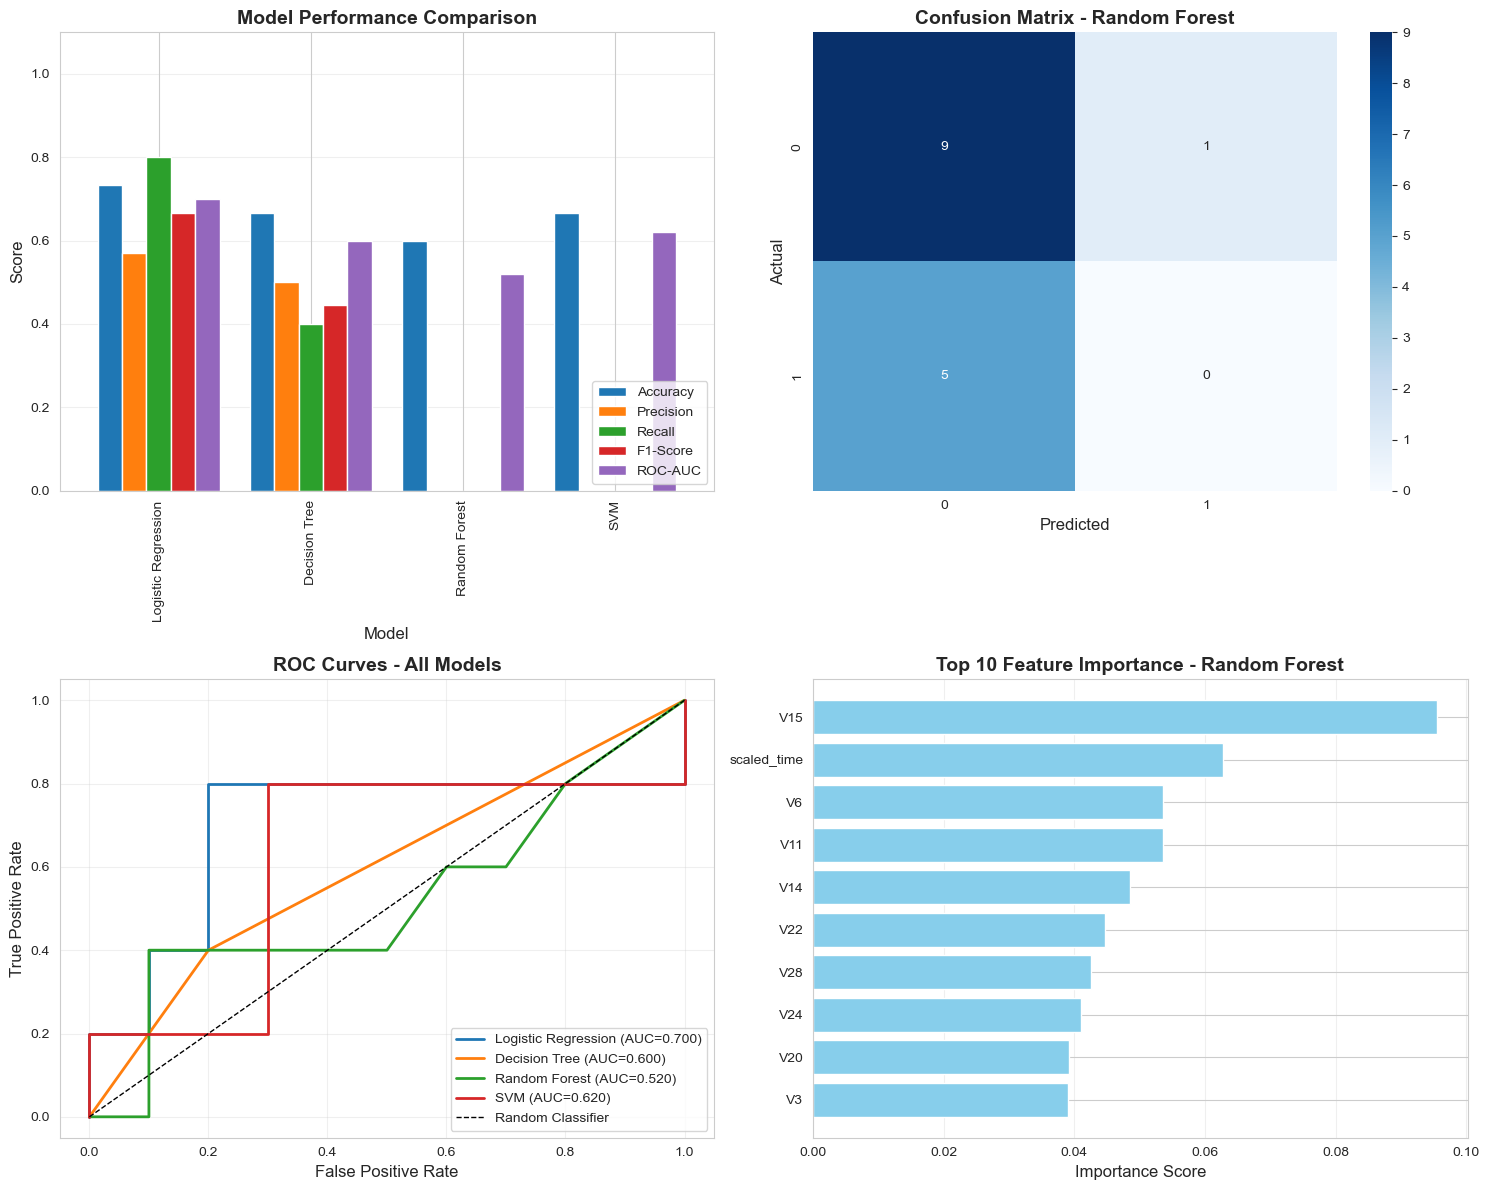


DETAILED CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

      Normal       0.64      0.90      0.75        10
       Fraud       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.32      0.45      0.38        15
weighted avg       0.43      0.60      0.50        15



In [5]:
# ============================================================================
#  MODEL EVALUATION & VISUALIZATION
# ============================================================================
print("\n[STEP 4] Model Evaluation & Visualization...")

# 4.1 Performance Comparison
metrics_df = pd.DataFrame({
    model: {
        'Accuracy': results[model]['accuracy'],
        'Precision': results[model]['precision'],
        'Recall': results[model]['recall'],
        'F1-Score': results[model]['f1'],
        'ROC-AUC': results[model]['roc_auc']
    }
    for model in results.keys()
}).T

print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(metrics_df.round(4))

# Save metrics
metrics_df.to_csv('model_performance_metrics.csv')
print("\n✓ Metrics saved: 'model_performance_metrics.csv'")

# 4.2 Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Performance Comparison
ax1 = axes[0, 0]
metrics_df.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12)
ax1.set_xlabel('Model', fontsize=12)
ax1.legend(loc='lower right', fontsize=10)
ax1.set_ylim([0, 1.1])
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Confusion Matrix - Best Model (Random Forest)
best_model = 'Random Forest'
cm = confusion_matrix(y_test, results[best_model]['y_pred'])
ax2 = axes[0, 1]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Confusion Matrix - {best_model}', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

# Plot 3: ROC Curves
ax3 = axes[1, 0]
for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    auc = results[name]['roc_auc']
    ax3.plot(fpr, tpr, label=f'{name} (AUC={auc:.3f})', linewidth=2)

ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
ax3.set_title('ROC Curves - All Models', fontsize=14, fontweight='bold')
ax3.set_xlabel('False Positive Rate', fontsize=12)
ax3.set_ylabel('True Positive Rate', fontsize=12)
ax3.legend(loc='lower right', fontsize=10)
ax3.grid(alpha=0.3)

# Plot 4: Feature Importance (Random Forest)
ax4 = axes[1, 1]
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

ax4.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
ax4.set_title('Top 10 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
ax4.set_xlabel('Importance Score', fontsize=12)
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('fraud_detection_results.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved: 'fraud_detection_results.png'")
plt.show()

# 4.3 Detailed Classification Report
print("\n" + "="*70)
print(f"DETAILED CLASSIFICATION REPORT - {best_model}")
print("="*70)
print(classification_report(y_test, results[best_model]['y_pred'], 
                          target_names=['Normal', 'Fraud']))



In [6]:
# ============================================================================
# KEY INSIGHTS & RECOMMENDATIONS
# ============================================================================
print("\n" + "="*70)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

print("\n1. MODEL PERFORMANCE:")
print(f"   • Best Model: {best_model}")
print(f"   • ROC-AUC Score: {results[best_model]['roc_auc']:.4f}")
print(f"   • F1-Score: {results[best_model]['f1']:.4f}")

print("\n2. BUSINESS IMPACT:")
print(f"   • True Positives: {cm[1,1]} frauds correctly detected")
print(f"   • False Negatives: {cm[1,0]} frauds missed (cost: high)")
print(f"   • False Positives: {cm[0,1]} false alarms (cost: moderate)")

print("\n" + "="*70)
print("PROJECT COMPLETE")
print("="*70)

print("  3. fraud_detection_results.png - Visualization dashboard")


KEY INSIGHTS & RECOMMENDATIONS

1. MODEL PERFORMANCE:
   • Best Model: Random Forest
   • ROC-AUC Score: 0.5200
   • F1-Score: 0.0000

2. BUSINESS IMPACT:
   • True Positives: 0 frauds correctly detected
   • False Negatives: 5 frauds missed (cost: high)
   • False Positives: 1 false alarms (cost: moderate)

PROJECT COMPLETE
  3. fraud_detection_results.png - Visualization dashboard
